In [161]:
N = ord("I") % 3 + 1
print(f"My variant is: {N}")

My variant is: 2


<h1>Tasks 1 and 2</h1>

In [10]:
import csv
import numpy as np

In [18]:
def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Skip the first row
        column_index = headers.index(column_name)  # Find the index of the column
        column_data = [row[column_index] for row in reader if row[column_index]]  # Get the column values
        return np.array(column_data, dtype=float)  # Return as numpy array

filename = 'russia_losses_equipment.csv'
tank_data = read_csv_column(filename, 'tank')[::-1]

print(tank_data)


[  80.  146.  150.  150.  198.  211.  217.  251.  269.  285.  290.  303.
  317.  335.  353.  362.  374.  389.  404.  430.  444.  450.  466.  476.
  498.  509.  517.  530.  561.  575.  582.  586.  597.  605.  614.  625.
  631.  644.  647.  676.  684.  698.  700.  705.  722.  725.  732.  739.
  753.  756.  762.  773.  790.  802.  815.  829.  838.  854.  873.  884.
  918.  939.  970.  986. 1008. 1026. 1048. 1062. 1077. 1092. 1110. 1122.
 1130. 1145. 1170. 1187. 1195. 1205. 1218. 1220. 1228. 1235. 1251. 1254.
 1263. 1278. 1285. 1293. 1302. 1305. 1315. 1322. 1330. 1338. 1349. 1358.
 1361. 1363. 1367. 1376. 1381. 1386. 1390. 1393. 1398. 1409. 1419. 1430.
 1432. 1434. 1440. 1449. 1456. 1465. 1468. 1477. 1496. 1496. 1504. 1507.
 1511. 1532. 1552. 1567. 1572. 1573. 1577. 1582. 1584. 1589. 1594. 1600.
 1602. 1637. 1638. 1641. 1645. 1649. 1649. 1667. 1672. 1677. 1684. 1687.
 1691. 1700. 1704. 1704. 1708. 1722. 1730. 1737. 1738. 1742. 1749. 1759.
 1763. 1768. 1768. 1774. 1789. 1792. 1802. 1805. 18

<h1>Task 3</h1>

In [20]:
#Find daily tanks losses
daily_losses = np.diff(tank_data)
print(daily_losses)

[66.  4.  0. 48. 13.  6. 34. 18. 16.  5. 13. 14. 18. 18.  9. 12. 15. 15.
 26. 14.  6. 16. 10. 22. 11.  8. 13. 31. 14.  7.  4. 11.  8.  9. 11.  6.
 13.  3. 29.  8. 14.  2.  5. 17.  3.  7.  7. 14.  3.  6. 11. 17. 12. 13.
 14.  9. 16. 19. 11. 34. 21. 31. 16. 22. 18. 22. 14. 15. 15. 18. 12.  8.
 15. 25. 17.  8. 10. 13.  2.  8.  7. 16.  3.  9. 15.  7.  8.  9.  3. 10.
  7.  8.  8. 11.  9.  3.  2.  4.  9.  5.  5.  4.  3.  5. 11. 10. 11.  2.
  2.  6.  9.  7.  9.  3.  9. 19.  0.  8.  3.  4. 21. 20. 15.  5.  1.  4.
  5.  2.  5.  5.  6.  2. 35.  1.  3.  4.  4.  0. 18.  5.  5.  7.  3.  4.
  9.  4.  0.  4. 14.  8.  7.  1.  4.  7. 10.  4.  5.  0.  6. 15.  3. 10.
  3.  6.  6. 15. 14.  3.  7.  8. 12.  4.  6.  3. 10.  8.  5.  7.  2.  3.
  5.  7.  3.  3.  5.  7. 20. 23. 12. 25. 15. 19.  9. 20. 15. 10. 14. 18.
 15.  6.  5. 13.  6.  3.  8.  2.  4. 11.  9. 18.  8. 13. 15. 16.  6. 13.
 13. 16. 23.  3. 44. 11. 14. 17.  6. 14.  9.  9.  1.  6. 10.  3.  5.  8.
 11.  6. 13.  6.  6.  5.  6. 21. 17.  3.  9. 19. 13

<h1>Task 4</h1>

In [52]:
#Find the 4 greatest daily losses of tanks
four_greatest_losses = np.sort(daily_losses)[-4::][::-1]
print(four_greatest_losses)

[66. 55. 48. 44.]


<h1>Task 5</h1>

In [54]:
import csv
import numpy as np
from datetime import datetime

def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader) 
        column_index = headers.index(column_name)
        column_data = [row[column_index] for row in reader if row[column_index]]
        
        # Handle date and numerical data separately
        if column_name == 'date':
            return np.array(column_data)
        else:
            return np.array(column_data, dtype=float) 

filename = 'russia_losses_equipment.csv'
date_data = read_csv_column(filename, 'date') 
tank_data = read_csv_column(filename, 'tank')

# Convert date strings to datetime objects for filtering
dates_as_dt = np.array([datetime.strptime(date, '%Y-%m-%d') for date in date_data])


first_day_of_spring = datetime(2024, 3, 1)
last_day_of_spring = datetime(2024, 5, 31)

first_day_mask = (dates_as_dt == first_day_of_spring)
tank_losses_first_day = tank_data[first_day_mask]

last_day_mask = (dates_as_dt == last_day_of_spring)
tank_losses_last_day = tank_data[last_day_mask]

difference = tank_losses_last_day.sum() - tank_losses_first_day.sum()

print(f"Tanks destroyed in the spring of 2024: {int(difference)}")


Tanks destroyed in the spring of 2024: 1118


<h1>Task 6</h1>

In [65]:
mean_last_100_days = np.sum(daily_losses[-100:])
print(f"Mean value of destroyed tanks in the last 100 days of war: {int(abs(mean_last_100_days) / 100)}")

Mean value of destroyed tanks in the last 100 days of war: 8


<h1>Task 7</h1>

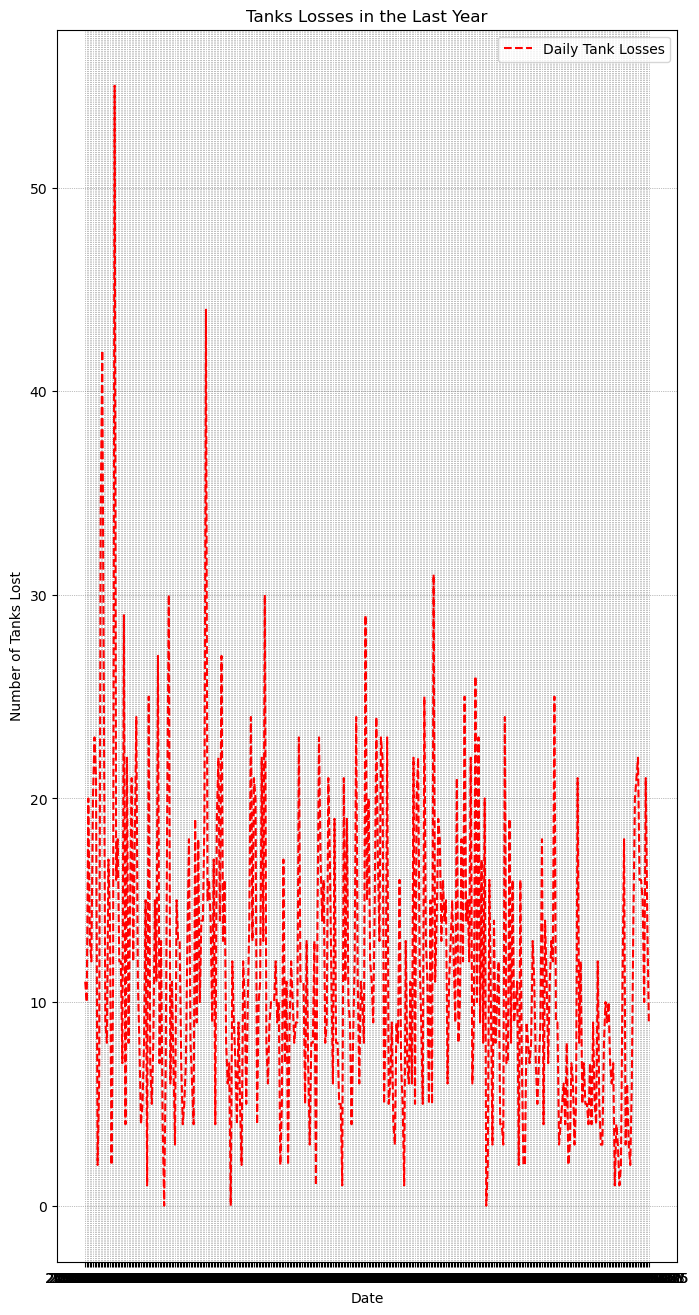

In [57]:
import matplotlib.pyplot as plt

# Plotting tanks losses for the last year (starting from the last date)
def plot_tank_losses(daily_losses, date_data):
    # Select last 365 days data 
    losses_last_year = daily_losses[-365:]
    dates_last_year = date_data[-365:]

    
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(dates_last_year, losses_last_year, linestyle='--', label='Daily Tank Losses', color='red')
    
    plt.title('Tanks Losses in the Last Year')
    plt.xlabel('Date')
    plt.ylabel('Number of Tanks Lost')
    plt.grid(True, which='both', color='gray', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    

    plt.savefig('tank_losses_last_year.png')
    plt.show()


date_data = read_csv_column(filename, 'date')
plot_tank_losses(daily_losses, date_data)

